# 10.1.1 Hyperplastic Formulation of Modified Cam-Clay

This example gives the numerical implementation for the hyperplastic formulation of the Modified Cam-Clay model (Houlsby & Puzrin, 2006).

The Gibbs free energy $g$ and the yield function $y$ for this model are given by:

\begin{align*}
g = & - \kappa p \left( \log \left( \frac{p}{p_0} \right) -1\right) - \frac{q^2}{6G} - (p \alpha_p + q \alpha_q) + (\Lambda - \kappa) p_{x0} \exp \left( \frac{\alpha_p}{\Lambda - \kappa} \right) \\
y = & \chi_p^2 + \frac{\chi_q^2}{M^2} - \left( p_{x0} \exp \left( \frac{\alpha_p}{\Lambda - \kappa} \right) \right)^2 = 0
\end{align*}

The incremental response for this model can be written as follows:

\begin{align*}
-\dot{\epsilon}_p = & \frac{\partial^2 g}{\partial p^2} \dot{p} \; {\color{red}{ + \frac{\partial^2 g}{\partial p \partial q} \dot{q} }} + \frac{\partial^2 g}{\partial p \partial \alpha_p} \dot{\alpha}_p {\color{red}{ + \frac{\partial^2 g}{\partial p \partial \alpha_q} \dot{\alpha}_q }}\\
-\dot{\epsilon}_q = & {\color{red}{ \frac{\partial^2 g}{\partial q \partial p} \dot{p} }} + \frac{\partial^2 g}{\partial q^2} \dot{q} \;{\color{red}{ + \frac{\partial^2 g}{\partial q \partial \alpha_p} \dot{\alpha}_p }} + \frac{\partial^2 g}{\partial q \partial \alpha_q} \dot{\alpha}_q\\
-\dot{\chi}_p = & \frac{\partial^2 g}{\alpha_p \partial p} \dot{p} \; {\color{red}{ + \frac{\partial^2 g}{\partial \alpha_p \partial q} \dot{q} }} + \frac{\partial^2 g}{\partial \alpha_p^2} \dot{\alpha}_p  {\color{red}{ + \frac{\partial^2 g}{\partial \alpha_p \partial \alpha_q} \dot{\alpha}_q }}\\
-\dot{\chi}_q = & {\color{red}{ \frac{\partial^2 g}{\alpha_q \partial p} \dot{p} }} + \frac{\partial^2 g}{\partial \alpha_q \partial q} \dot{q} \; {\color{red}{ + \frac{\partial^2 g}{\partial \alpha_q \partial \alpha_p} \dot{\alpha}_p + \frac{\partial^2 g}{\partial \alpha_q^2} \dot{\alpha}_q }}
\end{align*}

The rate of hardening strain is defined by:

\begin{align*}
\dot{\alpha}_p =  & \lambda \frac{\partial y}{\partial \chi_p} \\
\dot{\alpha}_q =  & \lambda \frac{\partial y}{\partial \chi_q} \\
\end{align*}

where the multiplyer $\lambda$ is derived from the consistency condition:
\begin{equation*}
\dot{y} = 0 = {\color{red}{ \frac{\partial y}{\partial p} \dot{p} + \frac{\partial y}{\partial q} \dot{q} }} + \frac{\partial y}{\partial \chi_p} \dot{\chi}_p + \frac{\partial y}{\partial \chi_q} \dot{\chi}_q + \frac{\partial y}{\partial \alpha_p} \dot{\alpha}_p \; {\color{red}{ + \frac{\partial y}{\partial \alpha_q} \dot{\alpha}_q }}
\end{equation*}

Combining the above equations with Ziegler's orthogonality condition ($\chi=\bar{\chi}$) gives:
\begin{align*}
0 = & -\frac{\partial y}{\partial \chi_p} \left( \frac{\partial^2 g}{\alpha_p \partial p} \dot{p} + \frac{\partial^2 g}{\partial \alpha_p^2} \lambda \frac{\partial y}{\partial \chi_p} \right) - \frac{\partial y}{\partial \chi_q} \frac{\partial^2 g}{\partial \alpha_q \partial q} \dot{q} + \frac{\partial y}{\partial \alpha_p} \lambda \frac{\partial y}{\partial \chi_p} 
\end{align*}

\begin{align*}
\lambda = &  \frac{ \frac{\partial y}{\partial \chi_p} \frac{\partial^2 g}{\alpha_p \partial p} \dot{p} + \frac{\partial y}{\partial \chi_q} \frac{\partial^2 g}{\partial \alpha_q \partial q} \dot{q}} {\frac{\partial y}{\partial \alpha_p} \frac{\partial y}{\partial \chi_p} -\frac{\partial y}{\partial \chi_p} \frac{\partial^2 g}{\partial \alpha_p^2} \frac{\partial y}{\partial \chi_p}}
\end{align*}

In [1]:
# The implementation of the above equations is given below
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Model parameters
G = 10
M = 1/2

kappa = 0.002
Lambda = 0.01
p_x0 = 1

# Define the applied stress history
p_init = 0.1
p_max_abs_1 = 20
d_p_abs = 0.01

p_history = np.arange(p_init, p_max_abs_1, d_p_abs)
q_history = 0 * p_history

indices = np.arange(0,len(p_history))

epsilon_p_history = np.zeros_like(p_history)
epsilon_q_history = np.zeros_like(q_history)

# Initialise the model state parameters
epsilon_p = 0
epsilon_q = 0
chi_p = p_history[0]
chi_q = q_history[0]
alpha_p = 0
alpha_q = 0

p_old = p_history[0]
q_old = q_history[0]

# Calculate the incremental response
for index, p, q in zip(indices, p_history, q_history):
    
    d_p = p - p_old
    d_q = q - q_old
    
    d2_g_d_p2  = -kappa / p
    d2_g_d_pap = -1
    d2_g_d_app = -1
    d2_g_d_ap2 = p_x0*np.exp(alpha_p/(Lambda-kappa))/(Lambda-kappa)

    d2_g_d_q2  = -1/(3*G)
    d2_g_d_qaq = -1
    d2_g_d_aqq = -1
      
    y = chi_p**2 + chi_q**2 / M**2 - (p_x0 * np.exp(alpha_p/(Lambda-kappa)))**2
    
    d_y_d_chi_p = 2 * chi_p
    d_y_d_chi_q = 2 * chi_q / M**2
    d_y_d_alpha_p = - 2 * p_x0**2 * np.exp(2*alpha_p/(Lambda-kappa)) / (Lambda-kappa)
    
    if y > 0 and (d_p * d_y_d_chi_p + d_q * d_y_d_chi_q) > 0:
        _lambda = (d_y_d_chi_p * d2_g_d_app * d_p + d_y_d_chi_q * d2_g_d_aqq * d_q)/(d_y_d_alpha_p * d_y_d_chi_p - d_y_d_chi_p * d2_g_d_ap2 * d_y_d_chi_p)
    else:
        _lambda = 0
                
    d_alpha_p = _lambda * d_y_d_chi_p
    d_alpha_q = _lambda * d_y_d_chi_q
        
    d_epsilon_p = - (d2_g_d_p2 * d_p + d2_g_d_pap * d_alpha_p)
    d_epsilon_q = - (d2_g_d_q2 * d_q + d2_g_d_qaq * d_alpha_q)
    
    d_chi_p = - (d2_g_d_app * d_p + d2_g_d_ap2 * d_alpha_p)
    d_chi_q = - (d2_g_d_aqq * d_q)
        
    epsilon_p = epsilon_p + d_epsilon_p
    epsilon_q = epsilon_q + d_epsilon_q
    chi_p = chi_p + d_chi_p
    chi_q = chi_q + d_chi_q
    alpha_p = alpha_p + d_alpha_p
    alpha_q = alpha_q + d_alpha_q
    
    p_old = p
    q_old = q
            
    epsilon_p_history[index] = epsilon_p
    epsilon_q_history[index] = epsilon_q

Text(0,0.5,'log($V$)')

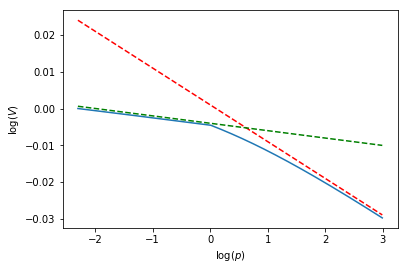

In [2]:
V_0 = 1
V = V_0 * (1 - epsilon_p_history)

plt.plot(np.log(p_history), np.log(V))

plt.plot(np.log(p_history), np.log(p_history**(-Lambda)+0.001) , 'r--')
plt.plot(np.log(p_history), np.log(p_history**(-kappa) -0.004) , 'g--')

plt.xlabel('log($p$)')
plt.ylabel('log($V$)')